In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=30caa6a170f7b1cf99f735114567a446e76eb25664f4ef4d9b70edbed5931448
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
from skfuzzy import control

In [ ]:
viscosity = fuzz.control.Antecedent(np.arange(0, 100, 1), 'Viscosity')
overrun = fuzz.control.Antecedent(np.arange(0, 100, 1), 'Overrun')
melting = fuzz.control.Antecedent(np.arange(0, 100, 1), 'Melting Rate')
firmness = fuzz.control.Antecedent(np.arange(0, 100, 1), 'Firmness')
quality = fuzz.control.Consequent(np.arange(0, 100, 1), 'Quality')

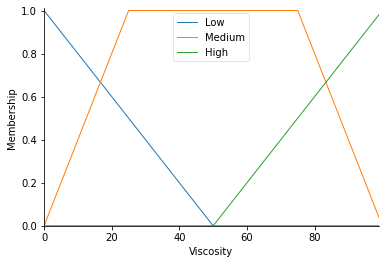

In [ ]:
viscosity['Low'] = fuzz.trimf(viscosity.universe, [ 0, 0, 50])
viscosity['Medium'] = fuzz.trapmf(viscosity.universe, [0, 25, 75, 100])
viscosity['High'] = fuzz.trimf(viscosity.universe, [50, 100, 100])
viscosity.view()

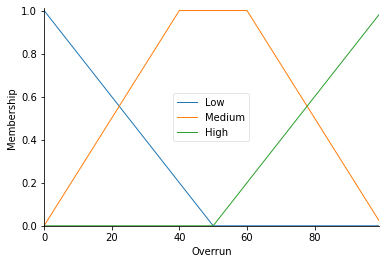

In [ ]:
overrun['Low'] = fuzz.trimf(overrun.universe, [0, 0, 50])
overrun['Medium'] = fuzz.trapmf(overrun.universe, [0, 40, 60, 100])
overrun['High'] = fuzz.trimf(overrun.universe, [50, 100, 100])
overrun.view()

In [ ]:
melting['Low'] = fuzz.smf(melting.universe,  0, 50)
melting['Medium'] = fuzz.trapmf(melting.universe, [0, 30, 70, 100])
melting['High'] = fuzz.zmf(melting.universe, 50, 100)
melting.view()


NameError: ignored

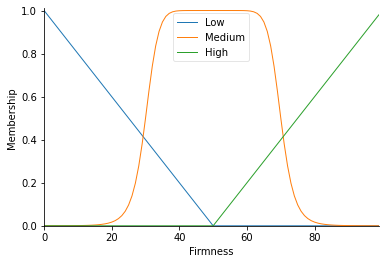

In [ ]:
firmness['Low'] = fuzz.trimf(firmness.universe, [0, 0, 50])
firmness['Medium'] = fuzz.gbellmf(firmness.universe, 20, 5, 50)
firmness['High'] = fuzz.trimf(firmness.universe, [50, 100, 100])
firmness.view()

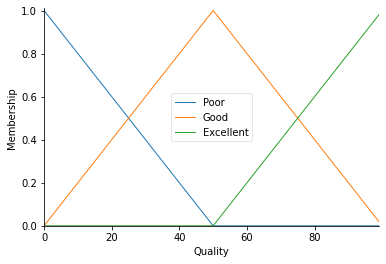

In [ ]:
quality['Poor'] = fuzz.trimf(quality.universe, [0, 0, 50])
quality['Good'] = fuzz.trimf(quality.universe, [0, 50, 100])
quality['Excellent'] = fuzz.trimf(quality.universe, [50, 100, 100])
quality.view()

In [ ]:
v = ['Low','Medium','High']
o = ['Low','Medium','High']
m = ['Low','Medium','High']
f = ['Low','Medium','High']

levels = [[[['Poor','Poor','Poor'],['Poor','Poor','Good'],['Poor','Good','Good']],
           [['Poor','Poor','Good'],['Poor','Good','Good'],['Good','Good','Excellent']],
           [['Poor','Good','Good'],['Good','Good','Excellent'],['Good','Excellent','Excellent']]],
          [[['Poor','Poor','Good'],['Poor','Good','Good'],['Good','Good','Excellent']],
           [['Poor','Good','Good'],['Good','Good','Good'],['Good','Good','Good']],
           [['Good','Good','Good'],['Good','Good','Good'],['Good','Good','Excellent']]],
          [[['Poor','Poor','Good'],['Good','Good','Good'],['Good','Good','Excellent']],
           [['Good','Good','Good'],['Good','Good','Good'],['Good','Good','Excellent']],
           [['Good','Good','Excellent'],['Good','Good','Excellent'],['Excellent','Excellent','Excellent']]]]

/usr/local/lib/python3.6/dist-packages/skfuzzy/control/visualization.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


[IF ((Viscosity[Low] AND Overrun[Low]) AND Melting Rate[Low]) AND Firmness[Low] THEN Quality[Poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Viscosity[Low] AND Overrun[Low]) AND Melting Rate[Low]) AND Firmness[Medium] THEN Quality[Poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Viscosity[Low] AND Overrun[Low]) AND Melting Rate[Low]) AND Firmness[High] THEN Quality[Poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Viscosity[Low] AND Overrun[Low]) AND Melting Rate[Medium]) AND Firmness[Low] THEN Quality[Poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Viscosity[Low] AND Overrun[Low]) AND Melting Rate[Medium]) AND Firmness[Medium] THEN Quality[Poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((Viscosity[Low] AND Overrun[Low]) AND Melting Rate[Medium]) AND Firmness[High] THEN Quality[Good]
 	AND aggregation function : fmin
 	OR aggre

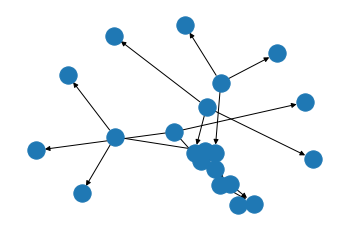

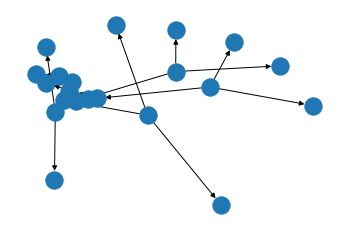

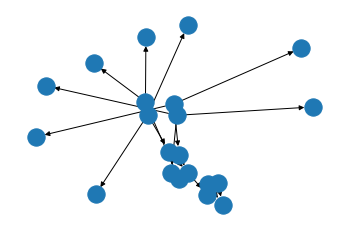

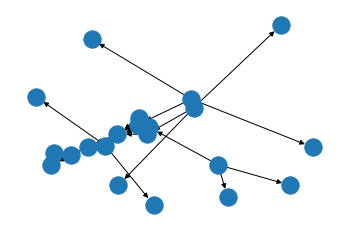

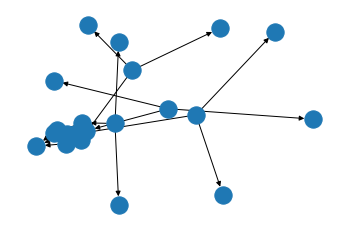

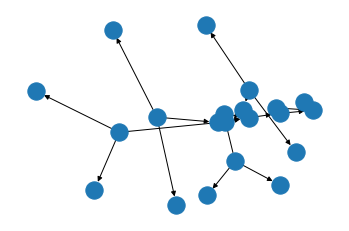

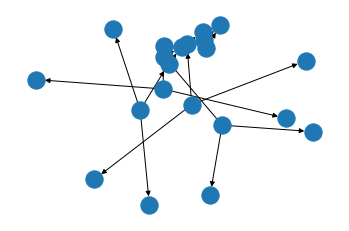

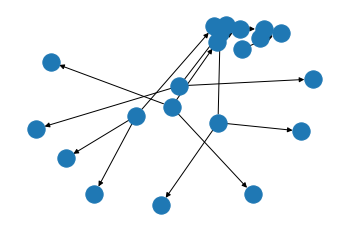

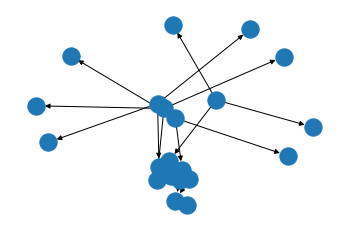

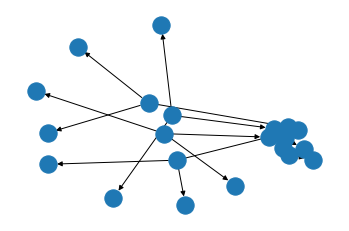

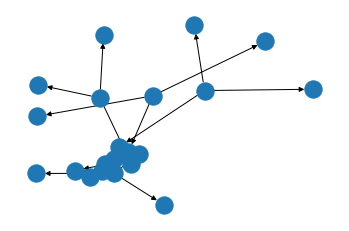

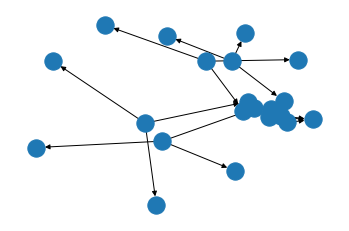

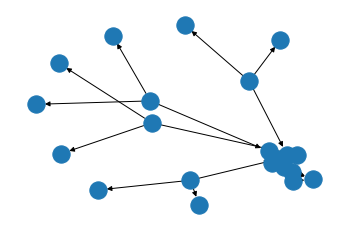

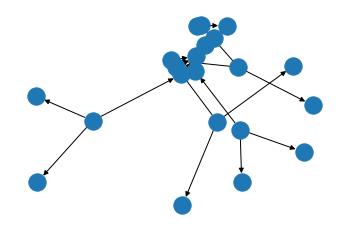

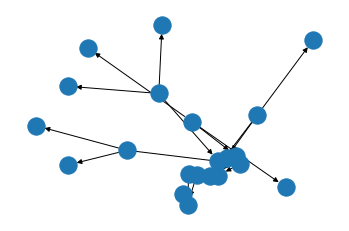

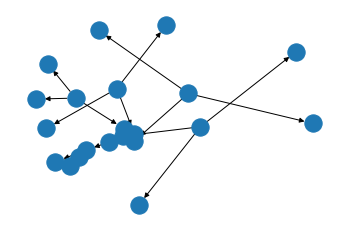

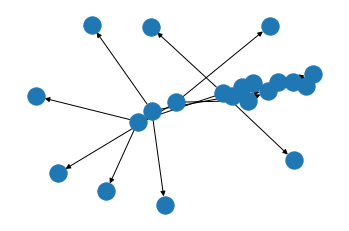

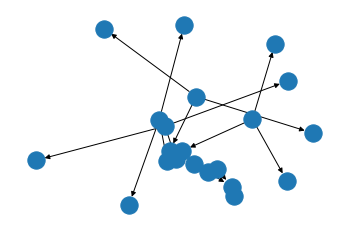

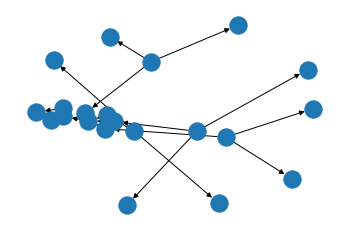

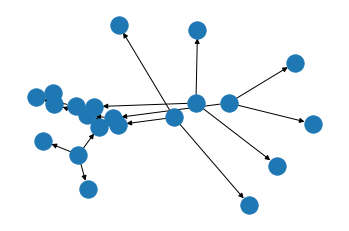

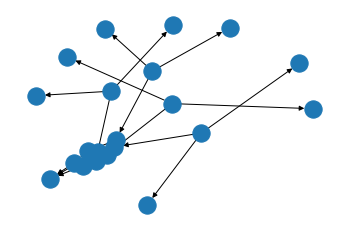

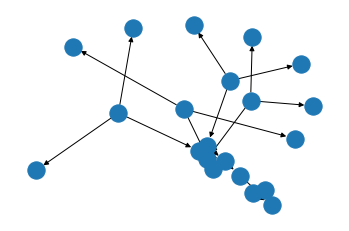

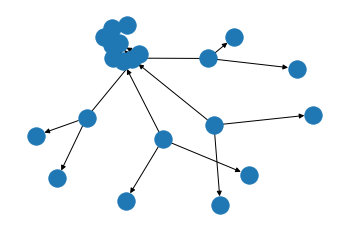

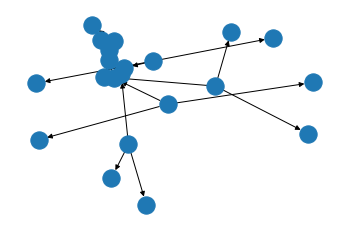

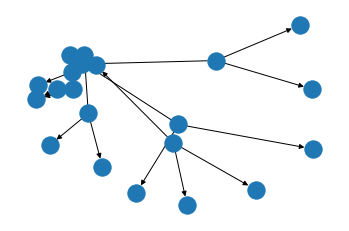

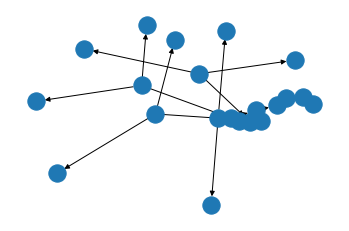

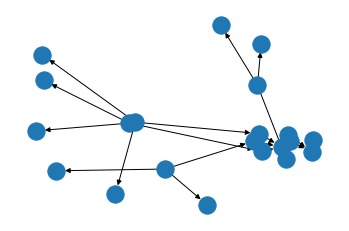

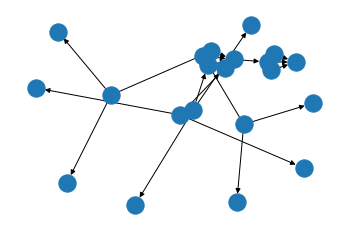

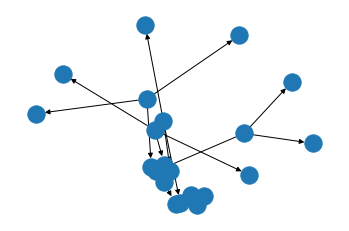

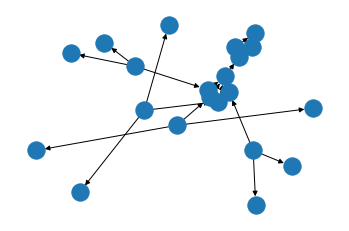

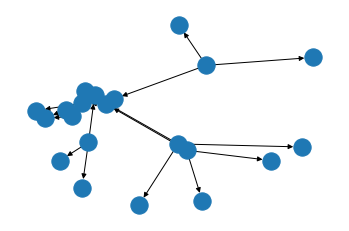

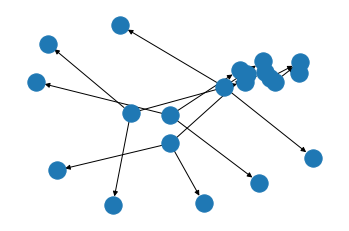

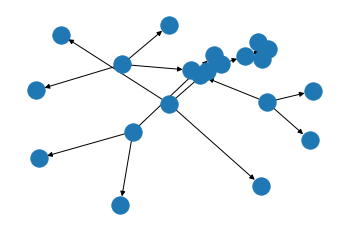

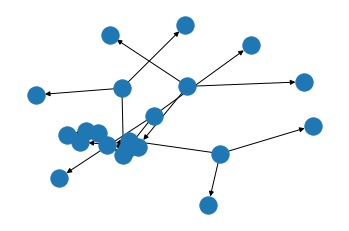

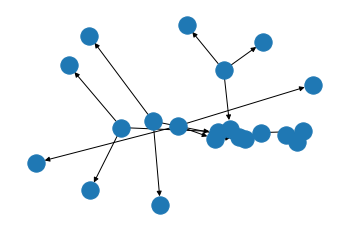

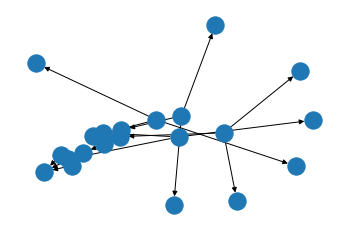

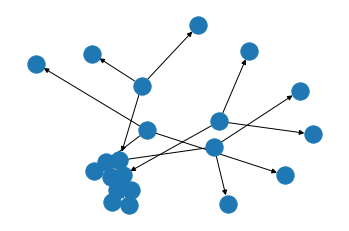

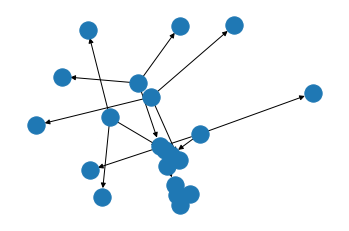

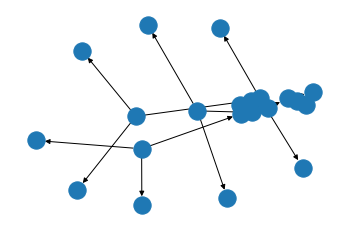

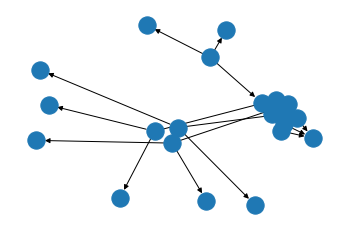

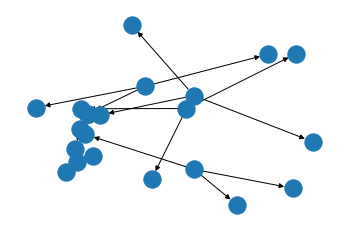

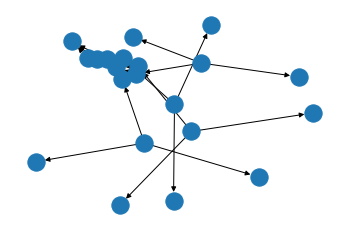

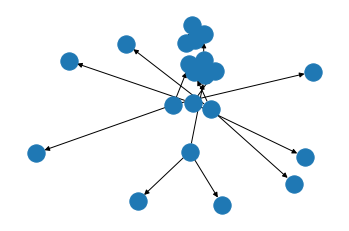

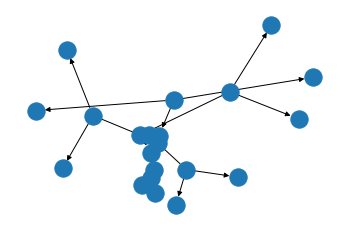

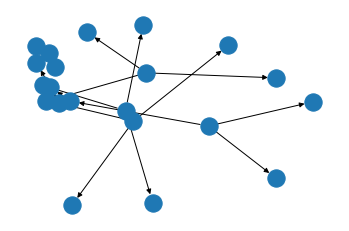

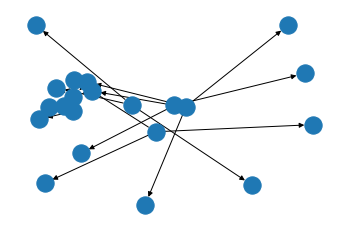

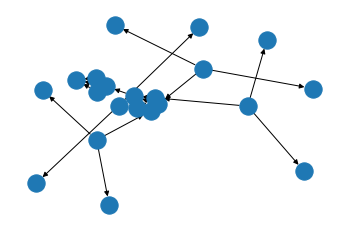

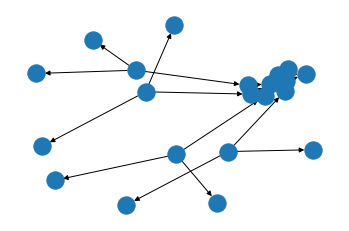

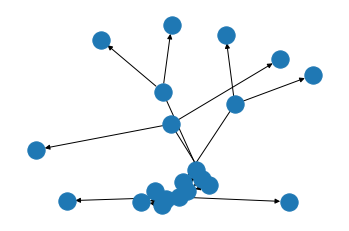

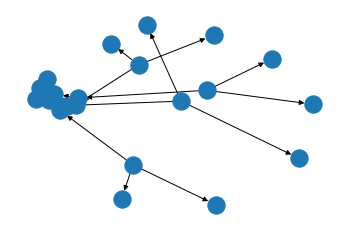

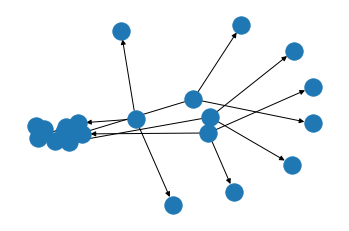

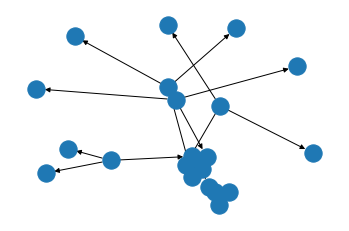

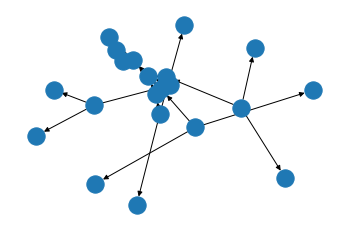

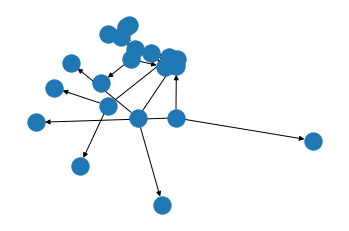

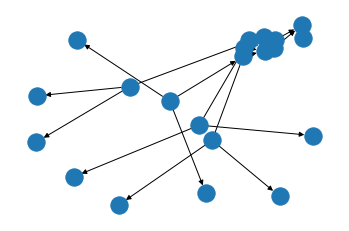

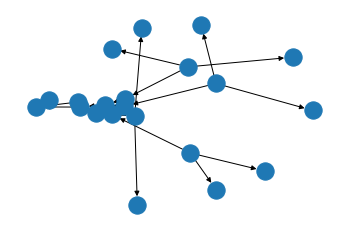

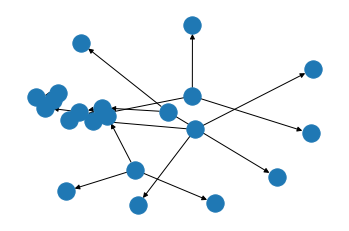

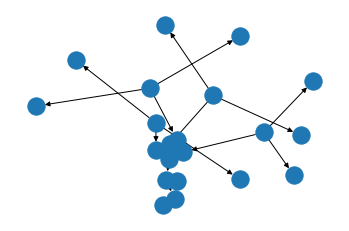

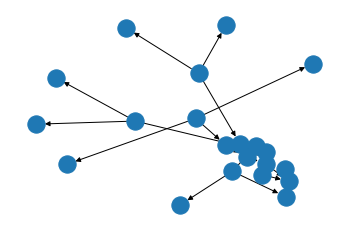

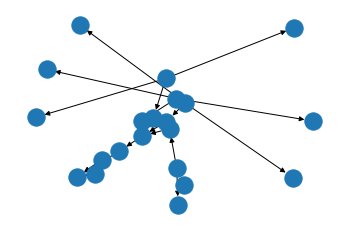

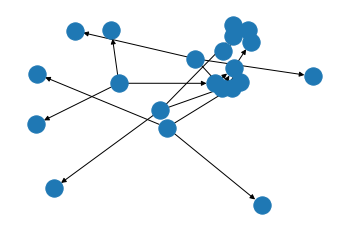

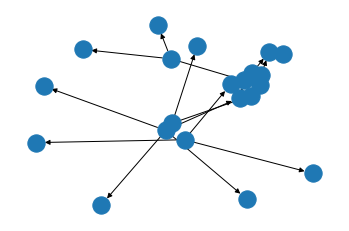

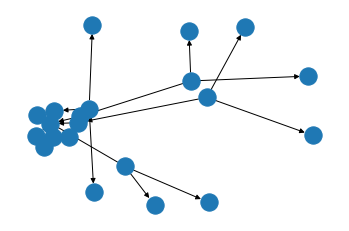

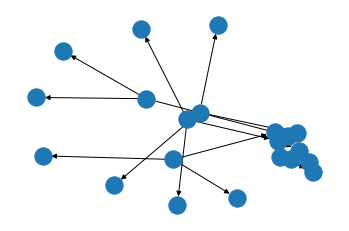

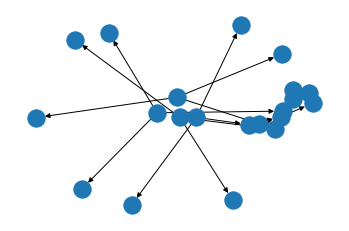

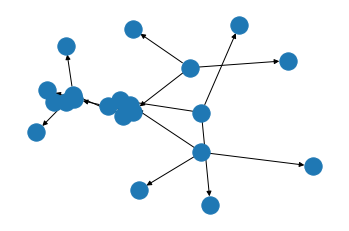

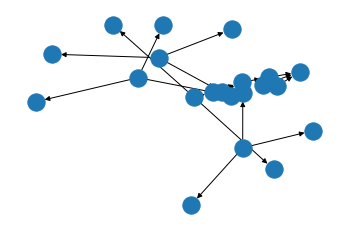

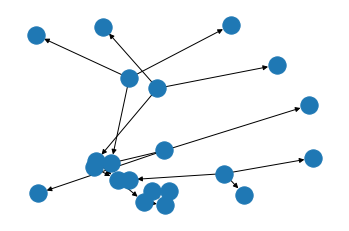

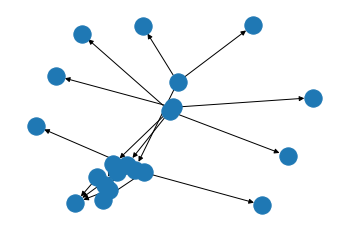

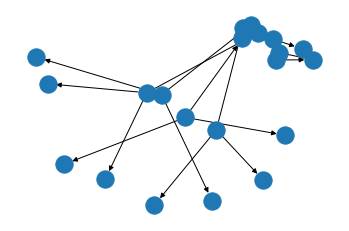

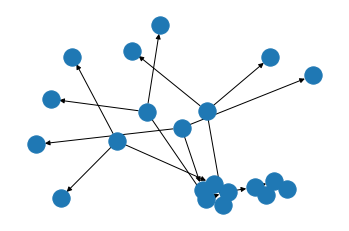

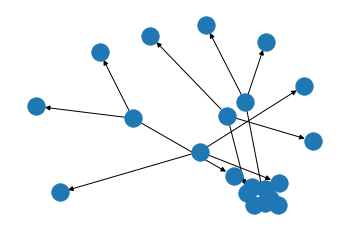

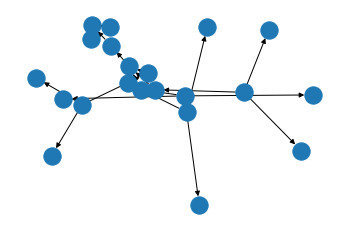

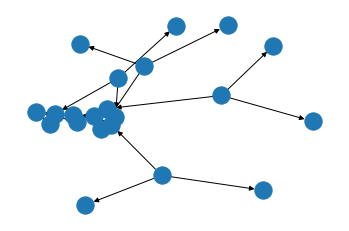

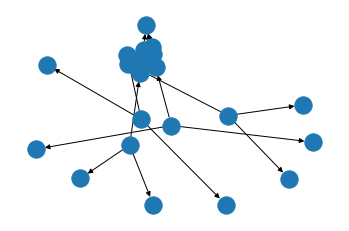

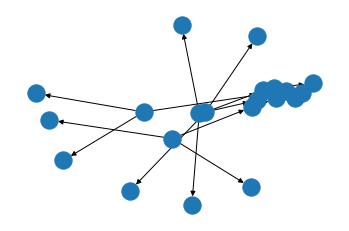

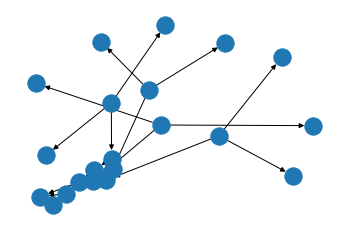

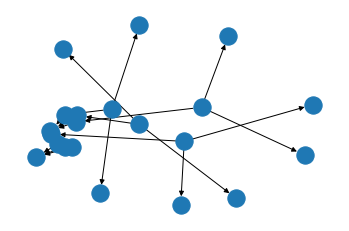

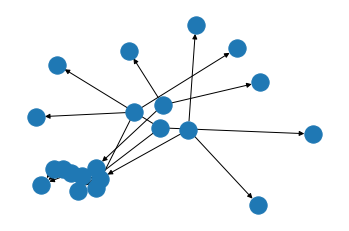

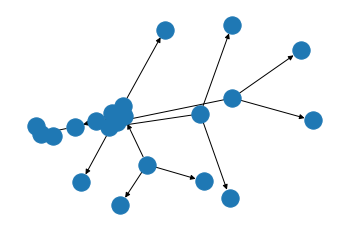

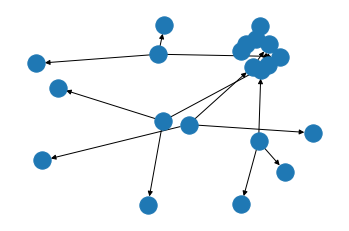

In [ ]:
Rcombined = []
for i,x in enumerate(v):
 for j,y in enumerate(o):
   for k,z in enumerate(m):
     for l,a in enumerate(f):
       rule = fuzz.control.Rule(viscosity[x] & overrun[y] & melting[z] & firmness[a], quality[levels[i][j][k][l]])
       rule.view()
       Rcombined.append(rule)
Rcombined

In [ ]:
controlSystem = fuzz.control.ControlSystem(Rcombined)

In [ ]:
sim = fuzz.control.ControlSystemSimulation(controlSystem)

Enter the Viscosity of the ice cream:90
Enter the Overrun of the ice cream:90
Enter the Melting Rate of the ice cream:50
Enter the Firmness of the ice cream:20
Quality: 49.99


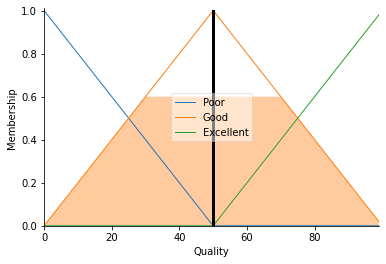

In [ ]:
sim.input['Viscosity'] = int(input("Enter the Viscosity of the ice cream:"))
sim.input['Overrun'] = int(input("Enter the Overrun of the ice cream:"))
sim.input['Melting Rate'] = int(input("Enter the Melting Rate of the ice cream:"))
sim.input['Firmness'] = int(input("Enter the Firmness of the ice cream:"))
sim.compute()
print("Quality:", round(sim.output['Quality'],2))
quality.view(sim = sim)

Enter the Viscosity of the ice cream:90
Enter the Overrun of the ice cream:90
Enter the Melting Rate of the ice cream:90
Enter the Firmness of the ice cream:20
Quality: 58.18


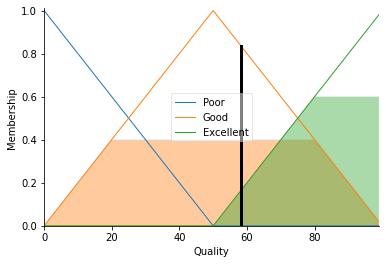

In [ ]:
sim.input['Viscosity'] = int(input("Enter the Viscosity of the ice cream:"))
sim.input['Overrun'] = int(input("Enter the Overrun of the ice cream:"))
sim.input['Melting Rate'] = int(input("Enter the Melting Rate of the ice cream:"))
sim.input['Firmness'] = int(input("Enter the Firmness of the ice cream:"))
sim.compute()
print("Quality:", round(sim.output['Quality'],2))
quality.view(sim = sim)

Enter the Viscosity of the ice cream:9
Enter the Overrun of the ice cream:10
Enter the Melting Rate of the ice cream:85
Enter the Firmness of the ice cream:87
Quality: 52.52


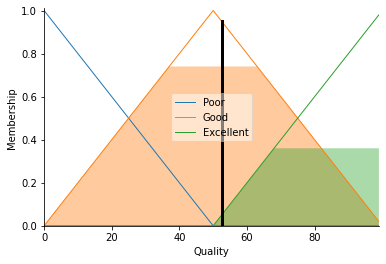

In [ ]:
sim.input['Viscosity'] = int(input("Enter the Viscosity of the ice cream:"))
sim.input['Overrun'] = int(input("Enter the Overrun of the ice cream:"))
sim.input['Melting Rate'] = int(input("Enter the Melting Rate of the ice cream:"))
sim.input['Firmness'] = int(input("Enter the Firmness of the ice cream:"))
sim.compute()
print("Quality:", round(sim.output['Quality'],2))
quality.view(sim = sim)

Enter the Viscosity of the ice cream:10
Enter the Overrun of the ice cream:14
Enter the Melting Rate of the ice cream:17
Enter the Firmness of the ice cream:19
Quality: 39.92


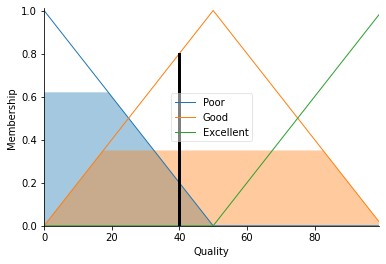

In [ ]:
sim.input['Viscosity'] = int(input("Enter the Viscosity of the ice cream:"))
sim.input['Overrun'] = int(input("Enter the Overrun of the ice cream:"))
sim.input['Melting Rate'] = int(input("Enter the Melting Rate of the ice cream:"))
sim.input['Firmness'] = int(input("Enter the Firmness of the ice cream:"))
sim.compute()
print("Quality:", round(sim.output['Quality'],2))
quality.view(sim = sim)